# Support Vector Machine (SVM) for EDP

### Authors - Charvi Jain and Shaurya Singh Srinet

### Importing necessary libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Reading the input data and preprocessing the images

In [2]:
# Set the data directory
base_directory = r"C:\Users\Charvi Jain\Downloads\dataset"
image_data = []
labels = []

for subdir, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.jpg'):
            image_path = os.path.join(subdir, file)
            label = subdir.split("\\")[-1]  # Assuming the subdirectories represent the labels

            # Preprocess the image (e.g., resize, normalize, convert to grayscale, etc.)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (128, 128))  # Adjust the size as needed
            image = image / 255.0  # Normalize pixel values

            image_data.append(image)
            labels.append(label)

In [3]:
X = np.array(image_data)
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Defining Class names and creating data visualization

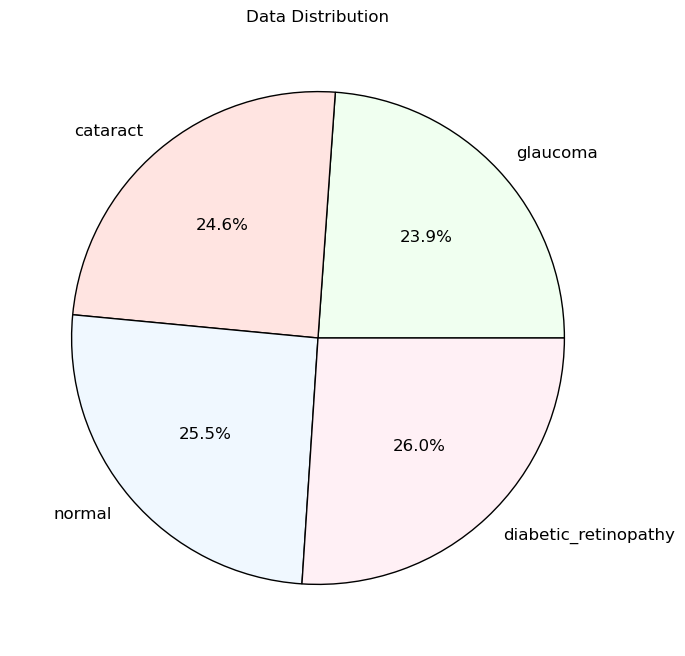

In [4]:
import matplotlib.pyplot as plt

class_names = ["glaucoma", "cataract", "normal", "diabetic_retinopathy"]
count_for_class_0 = 1007  
count_for_class_1 = 1038 
count_for_class_2 = 1074 
count_for_class_3 = 1098  
class_counts = [count_for_class_0, count_for_class_1, count_for_class_2, count_for_class_3]

colors = ['honeydew', 'mistyrose', 'aliceblue', 'lavenderblush'] 

text_props = {'color': 'black', 'fontsize': 12}

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', colors=colors, textprops=text_props, wedgeprops=dict(linewidth=1, edgecolor='black'))
plt.title('Data Distribution')
plt.show()


### Printing Image shape and flattening it

In [5]:
print(X_train.shape)
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)

(2334, 128, 128)


### Creating and train an SVM classifier


In [6]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train_flat, y_train)


SVC(kernel='linear', random_state=42)

### Model Evaluation

In [7]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Making predictions on the testing data
y_pred = clf.predict(X_test_flat)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6815068493150684


### Generating SVM Classifier Decision Boundary(2D)

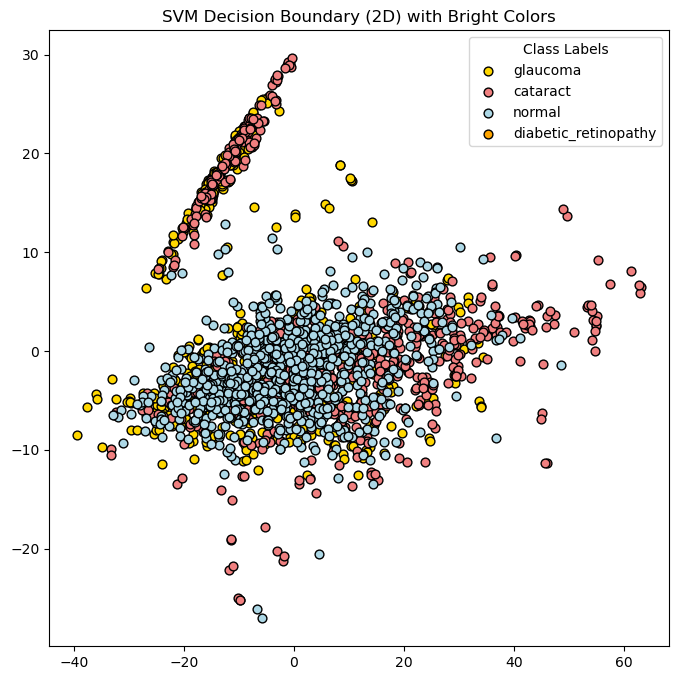

In [8]:
from sklearn.decomposition import PCA

# Flatten the image data for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_flat)
label_dict = {"glaucoma": 0, "cataract": 1, "normal": 2, "diabetic_retinopathy": 3}
y_train_numeric = np.array([label_dict[label] for label in y_train])
svm_colors = ['gold', 'lightcoral', 'lightblue', 'orange']
plt.figure(figsize=(8, 8))
for i in range(len(label_dict)):
    plt.scatter(X_train_2D[y_train_numeric == i, 0], X_train_2D[y_train_numeric == i, 1],
                label=list(label_dict.keys())[list(label_dict.values()).index(i)],
                color=svm_colors[i], edgecolor='black', s=40)

# Create a legend with class labels and bright colors
plt.legend(title='Class Labels', loc='best')

plt.title('SVM Decision Boundary (2D) with Bright Colors')
plt.show()


### Printing 3D Scatter Plot of Principal Components

In [25]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have already defined X_train, y_train

# Flatten the image data for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply PCA with 4 components for 3D visualization
pca = PCA(n_components=4)
X_train_3D = pca.fit_transform(X_train_flat)

label_dict = {"glaucoma": 0, "cataract": 1, "normal": 2, "diabetic_retinopathy": 3}
y_train_numeric = np.array([label_dict[label] for label in y_train])

# Create a DataFrame for Plotly
df = pd.DataFrame({
    'PC1': X_train_3D[:, 0],
    'PC2': X_train_3D[:, 1],
    'PC3': X_train_3D[:, 2],
    'PC4': X_train_3D[:, 3],
    'Label': [list(label_dict.keys())[list(label_dict.values()).index(i)] for i in y_train_numeric]
})

# Create an interactive 3D scatter plot with plotly express
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='Label',
                    symbol='Label', opacity=0.7, size_max=10,
                    labels={'Label': 'Class Labels'})

# Update layout for better visibility and add title
fig.update_layout(scene=dict(xaxis_title='Principal Component 1',
                             yaxis_title='Principal Component 2',
                             zaxis_title='Principal Component 3'),
                  legend=dict(title='Class Labels'),
                  title='3D Scatter Plot of Principal Components with Class Labels')

# Show the plot
fig.show()


### Printing the classification report

In [26]:
from sklearn.metrics import classification_report
class_names = ["glaucoma", "cataract", "normal", "diabetic_retinopathy"]
class_report = classification_report(y_test, y_pred, labels=class_names, zero_division=1)
print("Classification Report:\n", class_report)


Classification Report:
                       precision    recall  f1-score   support

            glaucoma       0.62      0.61      0.62       169
            cataract       0.63      0.73      0.68       199
              normal       0.79      0.69      0.74       216
diabetic_retinopathy       1.00      1.00      1.00         0

           micro avg       0.68      0.68      0.68       584
           macro avg       0.76      0.76      0.76       584
        weighted avg       0.69      0.68      0.68       584

